In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
nrows = -1 # to avoid loading full file each time
if nrows != -1 :
    data = pd.read_csv('data.csv', sep=';', nrows = nrows, dtype={'CODGEO': object})
else:
     data= pd.read_csv('data.csv', sep=';', dtype={'CODGEO': object})


/home/jc/miniconda3/envs/udacity/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.shape

(34970, 96)

In [4]:
data.head()

,CODGEO,LIBGEO,REG,DEP,NB_F101,NB_F101_NB_AIREJEU,NB_F101_NB_COU,NB_F101_NB_ECL,NB_F102,NB_F102_NB_AIREJEU,...,NB_F202,NB_F202_NB_AIREJEU,NB_F203,NB_F203_NB_AIREJEU,NB_F303,NB_F303_NB_SALLES,NB_F304,NB_F305,NB_F306,NB_F306_NB_SALLES
0,01001,L'Abergement-Clémenciat,84,1,0,0,0,0,1,2,...,0,0,0,0,0,0,0,0,0,0
1,01002,L'Abergement-de-Varey,84,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,01004,Ambérieu-en-Bugey,84,1,1,2,1,1,4,4,...,0,0,0,0,1,3,0,0,0,0
3,01005,Ambérieux-en-Dombes,84,1,0,0,0,0,3,4,...,0,0,0,0,0,0,0,0,0,0
4,01006,Ambléon,84,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#data = data[~data['REG'].isin(['84'])]

In [6]:
data.shape

(34970, 96)

In [7]:
data[data['NB_F101_NB_AIREJEU']==111]

,CODGEO,LIBGEO,REG,DEP,NB_F101,NB_F101_NB_AIREJEU,NB_F101_NB_COU,NB_F101_NB_ECL,NB_F102,NB_F102_NB_AIREJEU,...,NB_F202,NB_F202_NB_AIREJEU,NB_F203,NB_F203_NB_AIREJEU,NB_F303,NB_F303_NB_SALLES,NB_F304,NB_F305,NB_F306,NB_F306_NB_SALLES
29274,75056,Paris,11,75,84,111,81,82,57,78,...,0,0,0,0,83,401,58,18,145,184


In [8]:
data['REG'].unique()

array([84, 32, 93, 44, 76, 28, 75, 24, 27, 53, 94, 52, 11,  1,  2,  3,  4,
        6])

In [9]:
# removing Guadeloupe, Martinique, Guyane, La réunion and Mayotte
data = data[~data['REG'].isin(['1','2','3','4','6'])]

In [10]:
data['REG'].unique()

array([84, 32, 93, 44, 76, 28, 75, 24, 27, 53, 94, 52, 11])

In [11]:
# manage region names
regions = {
    11:'ILE DE FRANCE',
    24:'CENTRE VAL DE LOIRE',
    27:'BOURGOGNE FRANCHE COMTE',
    28:'NORMANDIE',
    32:'HAUTS DE FRANCE',
    44:'GRAND EST',
    52:'PAYS DE LA LOIRE',
    53:'BRETAGNE',
    75:'NOUVELLE AQUITAINE',
    76:'OCCITANIE',
    84:'AUVERGNE RHONE ALPES',
    93:'PROVENCE ALPES COTE D AZUR',
    94:'CORSE'
}

In [12]:
data['Region'] = data['REG'].map(regions)

In [13]:
data['Region'].head()

0    AUVERGNE RHONE ALPES
1    AUVERGNE RHONE ALPES
2    AUVERGNE RHONE ALPES
3    AUVERGNE RHONE ALPES
4    AUVERGNE RHONE ALPES
Name: Region, dtype: object

In [14]:
#data = data[data['REG'].isin(['84'])]

In [15]:
#try to graph the number of equipment compared to avg
data['mean_piscine'] = data['NB_F101'] - data['NB_F101'].mean()

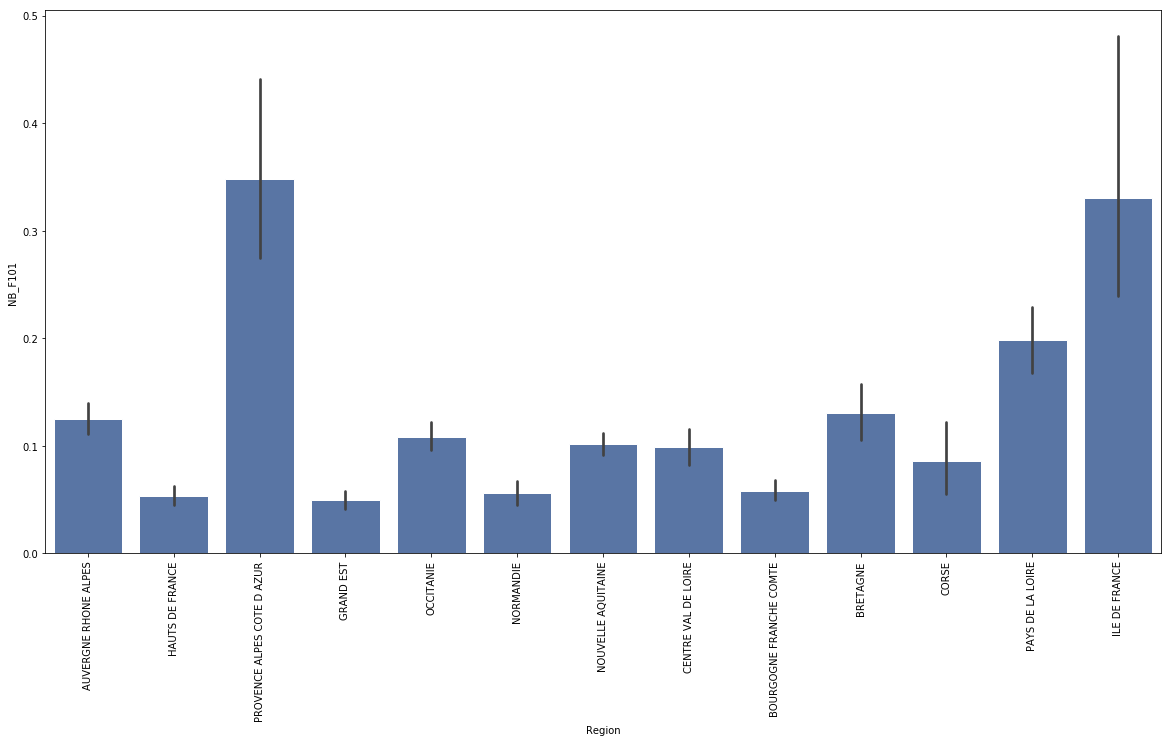

In [17]:
fig=plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(1,1,1)
sns.set(font_scale=1)
snsbp = sns.barplot(data=data,x='Region',y='NB_F101',ax=ax1,color='b');
snsbp.set_xticklabels(snsbp.get_xticklabels(), rotation=90);

In [18]:
# display top 10 cities with most swimmingpool
top_10 = data.sort_values(by='NB_F101', ascending=False)

In [19]:
top_10 = top_10[:10]
top_10

,CODGEO,LIBGEO,REG,DEP,NB_F101,NB_F101_NB_AIREJEU,NB_F101_NB_COU,NB_F101_NB_ECL,NB_F102,NB_F102_NB_AIREJEU,...,NB_F203,NB_F203_NB_AIREJEU,NB_F303,NB_F303_NB_SALLES,NB_F304,NB_F305,NB_F306,NB_F306_NB_SALLES,Region,mean_piscine
29274,75056,Paris,11,75,84,111,81,82,57,78,...,0,0,83,401,58,18,145,184,ILE DE FRANCE,83.89653
4347,13055,Marseille,93,13,29,33,18,20,62,78,...,0,0,11,51,15,1,21,30,PROVENCE ALPES COTE D AZUR,28.89653
11812,31555,Toulouse,76,31,14,26,11,12,79,101,...,2,2,6,32,8,1,10,18,OCCITANIE,13.89653
27110,69123,Lyon,84,69,14,22,9,11,27,47,...,0,0,15,92,12,1,18,29,AUVERGNE RHONE ALPES,13.89653
4293,13001,Aix-en-Provence,93,13,11,17,5,5,20,20,...,0,0,4,16,7,1,5,7,PROVENCE ALPES COTE D AZUR,10.89653
1957,06088,Nice,93,6,11,16,10,7,3,10,...,0,0,8,42,13,1,4,6,PROVENCE ALPES COTE D AZUR,10.89653
11098,30189,Nîmes,76,30,11,14,5,9,11,15,...,3,9,4,32,6,1,3,6,OCCITANIE,10.89653
13018,34172,Montpellier,76,34,10,13,10,10,29,37,...,0,0,5,35,4,1,14,19,OCCITANIE,9.89653
10294,29019,Brest,53,29,8,10,8,8,18,19,...,9,10,4,30,2,1,2,6,BRETAGNE,7.89653
32445,84007,Avignon,93,84,8,11,4,4,5,6,...,1,1,5,24,3,2,8,15,PROVENCE ALPES COTE D AZUR,7.89653


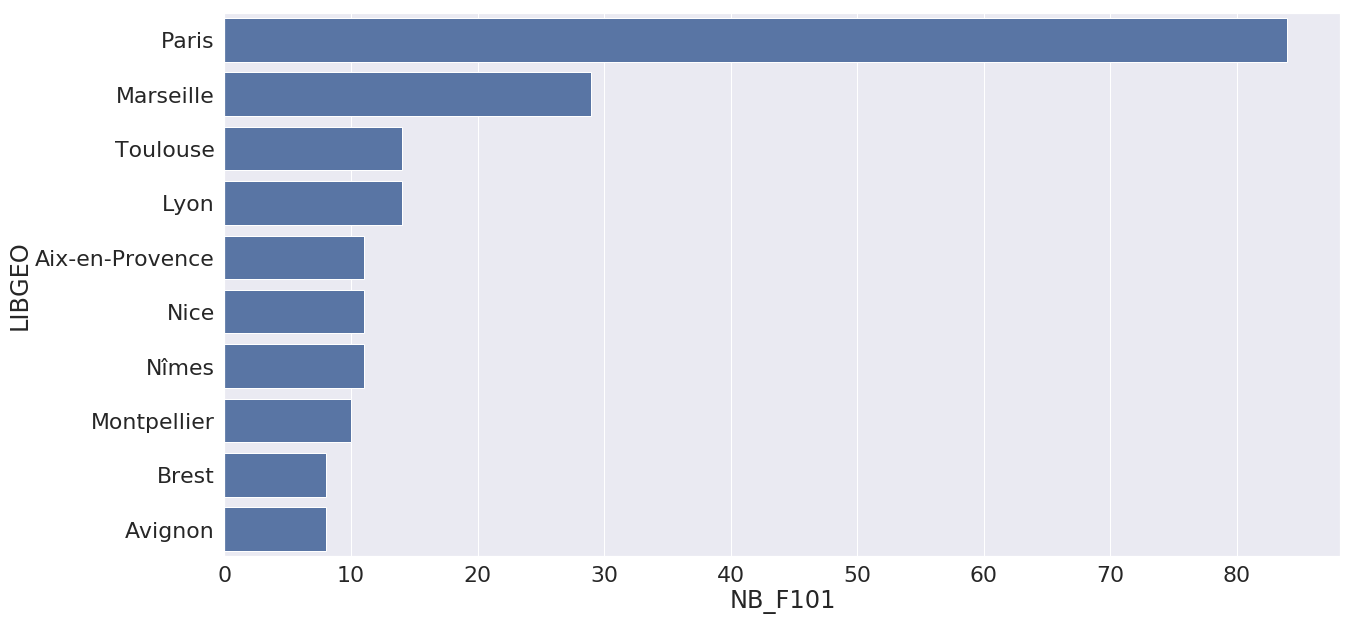

In [20]:
fig=plt.figure(figsize=(20,10))
sns.set(font_scale=2)
snsbp = sns.barplot(data=top_10, y='LIBGEO', x='NB_F101', color='b', capsize=0.5);
snsbp.set_xticklabels(snsbp.get_xticklabels(), rotation=90 ,minor=True);

In [21]:
jsonfile = 'communes-20190101.json'
map_df = gpd.read_file(jsonfile)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
#map_df.head()

In [22]:
col_names = data.columns.values
col_names[0] = 'insee'
data.columns = col_names

In [23]:
#map_df[map_df['insee']=='74208']
#data = data[data['insee']=='74208']

In [24]:
merged = map_df.merge(data, on='insee')

In [111]:
# create a function to plot on the map
def plot_column(mydata, columnname, maptitle, color=plt.cm.Blues):
    vmin, vmax = int(np.min(mydata[columnname])), int(np.max(mydata[columnname]))
    fig, ax = plt.subplots(1, figsize=(20, 10))
    mydata.plot(column=columnname, cmap=color, ax=ax, scheme='Quantiles', legend=True, k=100) #plt.cm.plasma 'OrRd'
    ax.set_title(maptitle, fontsize=5)

/home/jc/miniconda3/envs/udacity/lib/python3.6/site-packages/mapclassify/classifiers.py:95: UserWarning: Warning: Not enough unique values in array to form k classes
  UserWarning)
/home/jc/miniconda3/envs/udacity/lib/python3.6/site-packages/mapclassify/classifiers.py:96: UserWarning: Warning: setting k to 2
  Warn('Warning: setting k to %d' % k_q, UserWarning)


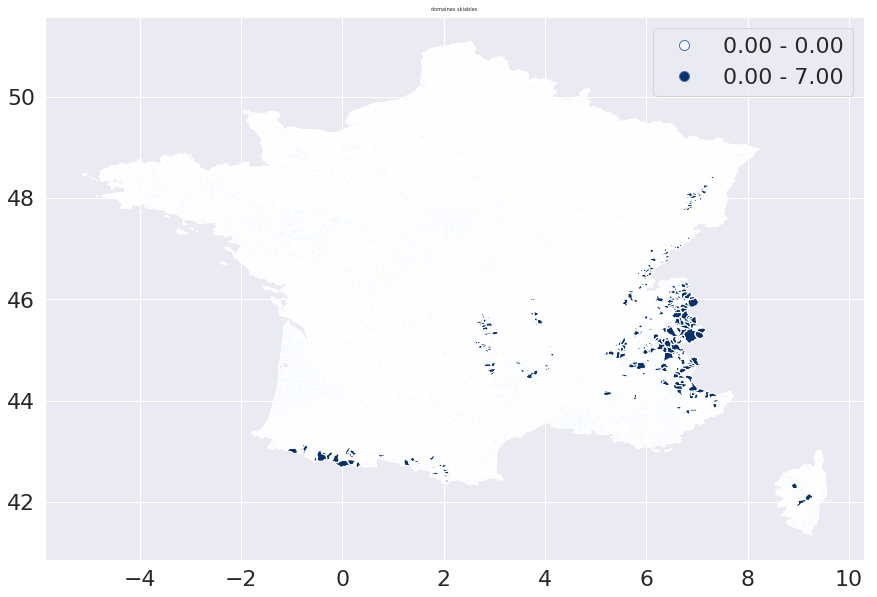

In [112]:
plot_column(merged, 'NB_F105','domaines skiables')

In [33]:
population = pd.read_csv('population-par-commune.csv', sep = ';', dtype={'Code INSEE': object})

In [35]:
col_names = population.columns.values
col_names[0] = 'insee'
population.columns = col_names

In [37]:
all_data = merged.merge(population, on='insee')

In [40]:
all_data.head()

,insee,nom,wikipedia,surf_ha,geometry,LIBGEO,REG,DEP,NB_F101,NB_F101_NB_AIREJEU,...,Ouvriers > 55 ans,Retraités > 55 ans,Autres professions > 55 ans,Superficie,Département,Région,geo_shape,EPCI,Densité d'habitants (hab/km2),geo_point_2d
0,91556,Saint-Hilaire,fr:Saint-Hilaire (Essonne),681,"POLYGON ((2.0631954 48.44341819983009, 2.07049...",Saint-Hilaire,11,91,0,0,...,8.000,72.000000,4.000000,6.83,ESSONNE,ILE-DE-FRANCE,"{""type"": ""Polygon"", ""coordinates"": [[[2.063372...",CA Etampois Sud Essonne,57.540264,"48.4406689408,2.08770096229"
1,91148,Chauffour-lès-Étréchy,fr:Chauffour-lès-Étréchy,481,"POLYGON ((2.1499985 48.50944459981384, 2.15286...",Chauffour-lès-Étréchy,11,91,0,0,...,0.000,19.714286,3.942857,4.84,ESSONNE,ILE-DE-FRANCE,"{""type"": ""Polygon"", ""coordinates"": [[[2.151482...",CC Entre Juine et Renarde (Ccejr),28.512397,"48.5074992936,2.16906346305"
2,77395,Rumont,fr:Rumont (Seine-et-Marne),660,"POLYGON ((2.473613399999999 48.27057719987241,...",Rumont,11,77,0,0,...,7.936,19.840000,0.000000,6.61,SEINE-ET-MARNE,ILE-DE-FRANCE,"{""type"": ""Polygon"", ""coordinates"": [[[2.502982...",CC les Terres du Gâtinais,18.759455,"48.2706083071,2.49565291439"
3,77003,Amponville,fr:Amponville,1193,"POLYGON ((2.502611299999999 48.28748679986828,...",Amponville,11,77,0,0,...,0.000,32.000000,4.000000,11.93,SEINE-ET-MARNE,ILE-DE-FRANCE,"{""type"": ""Polygon"", ""coordinates"": [[[2.556309...",CC les Terres du Gâtinais,32.523051,"48.2883530313,2.53139820995"
4,77041,Boissy-aux-Cailles,fr:Boissy-aux-Cailles,1638,"POLYGON ((2.4561017 48.32177099985992, 2.45993...",Boissy-aux-Cailles,11,77,0,0,...,0.000,52.000000,0.000000,16.33,SEINE-ET-MARNE,ILE-DE-FRANCE,"{""type"": ""Polygon"", ""coordinates"": [[[2.456026...",CC les Terres du Gâtinais,19.044703,"48.3122700771,2.49307014277"


In [39]:
all_data.shape

(1267, 165)

In [45]:
population.columns

Index(['insee', 'Code Département', 'Commune', 'Population totale',
       'Population 0-14 ans', 'Population 15-29 ans', 'Population 30-44 ans',
       'Population 45-59 ans', 'Population  60-74 ans', 'Population 75-89 ans',
       'Population 90 ans ou plus', 'Population Hommes',
       'Population Hommes 0-14 ans', 'Population Hommes 15-29 ans',
       'Population Hommes 30-44 ans', 'Population Hommes 45-59 ans',
       'Population Hommes 60-74 ans', 'Population Hommes 75-89 ans',
       'Pop Hommes 90 ans ou plus', 'Population Hommes 0-19 ans',
       'Population Hommes 20-64 ans', 'Population Hommes 65 ans ou plus',
       'Population Femmes en 2011', 'Population Femmes 0-14 ans',
       'Population Femmes 15-29 ans', 'Population Femmes 30-44 ans',
       'Population Femmes 45-59 ans', 'Population Femmes 60-74 ans',
       'Population Femmes 75-89 ans', 'Population Femmes 90 ans ou plus',
       'Population Femmes 0-19 ans',
       'Population Femmes 20-64 ans en 2011 (princ)',
  

In [70]:
taille_ville = all_data.sort_values(by='Population 15-29 ans', ascending=False)

In [117]:
columns = ['Population 15-29 ans','Commune', 'NB_F101', 'geometry']
tvilles = pd.DataFrame(taille_ville, columns=columns)

In [118]:
tvilles['dens'] = tvilles['NB_F101'] * 10000 / tvilles['Population 15-29 ans'] 

In [119]:
x = tvilles['Population 15-29 ans']
y = tvilles['dens']

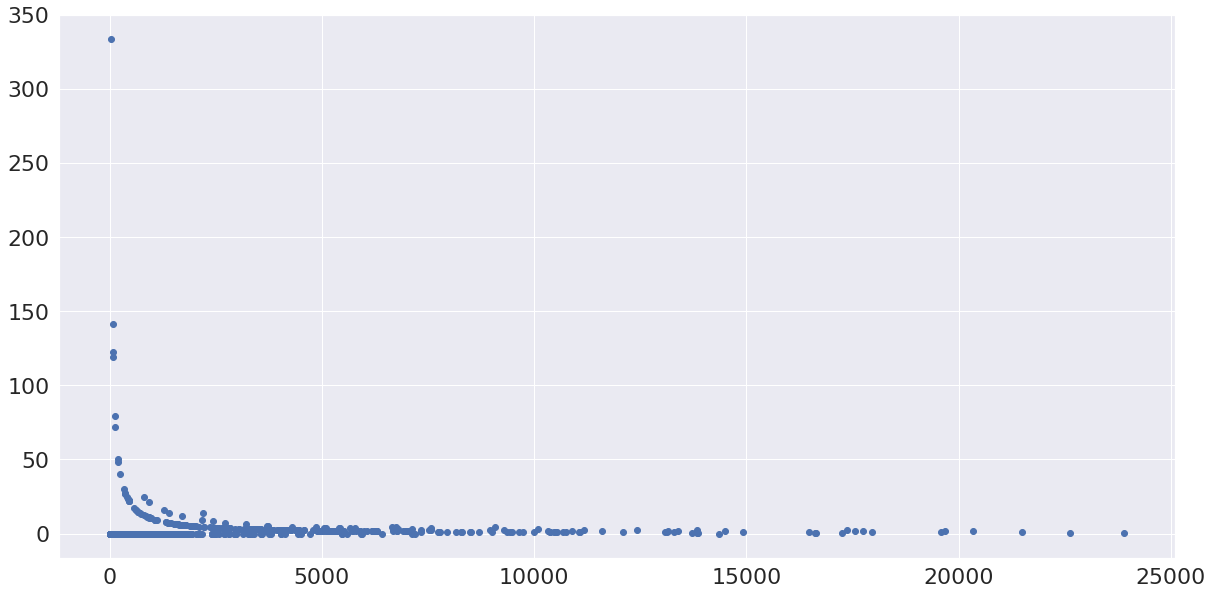

In [120]:
plt.figure(figsize=(20,10))
plt.scatter(x,y);

In [121]:
tvilles.sort_values(by='dens', ascending=False)

,Population 15-29 ans,Commune,NB_F101,geometry,dens
999,30.000000,Villiers-en-Bière,1,"POLYGON ((2.5857648 48.51477309981252, 2.60422...",333.333333
330,70.744681,Sailly,1,"POLYGON ((1.772817199999999 49.04193419968194,...",141.353383
242,81.830518,Ocquerre,1,"POLYGON ((3.038155499999999 49.04572899968099,...",122.203796
1097,83.891980,Buthiers,1,"POLYGON ((2.420512 48.29927469986541, 2.428183...",119.200905
232,125.834827,Bellot,1,"POLYGON ((3.297048699999999 48.84913279972973,...",79.469255
7,138.807275,Nanteau-sur-Lunain,1,"POLYGON ((2.775409199999999 48.24849329987778,...",72.042334
444,198.000000,Grandpuits-Bailly-Carrois,1,"POLYGON ((2.952282499999999 48.59529759979264,...",50.505051
372,206.937140,Mours,1,"POLYGON ((2.2348824 49.13037279966008, 2.23784...",48.323853
447,248.886316,Courpalay,1,"POLYGON ((2.929586699999999 48.65292419977838,...",40.178987
807,330.557513,Égreville,1,"POLYGON ((2.837513899999999 48.1659811998978, ...",30.251922


AttributeError: Unknown property column

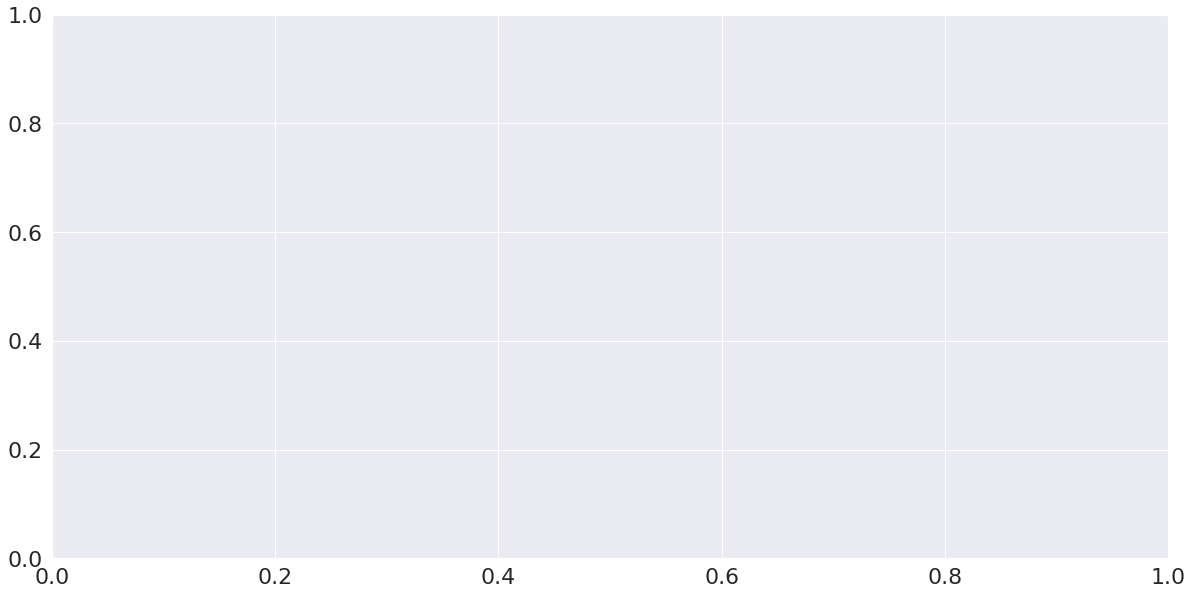

In [122]:
plot_column(tvilles, 'NB_F101', 'nb piscine par habitants')

In [123]:
tvilles.columns

Index(['Population 15-29 ans', 'Commune', 'NB_F101', 'geometry', 'dens'], dtype='object')